In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
from dataload import *
from model import *
from research import *
from helper_functions import *

DATA

In [3]:
calculer = True

In [4]:
if calculer == False:
  dataframe = pd.read_csv('../data/Pays-Bas/Eredevisie/N1_fullDataWithNotes.csv')
else:
  dataframe = pd.read_csv('../data/Pays-Bas/Eredevisie/N1 10:11.csv')
  for i in range(10, 23):
    d2 = pd.read_csv(f"../data/Pays-Bas/Eredevisie/N1 {i}:{i + 1}.csv")
    dataframe = pd.concat([dataframe, d2])
  dataframe = arrange_data(dataframe, 'FTHG', 'FTAG', 'HA_Scored', 'Total_Goals')

print(f"{dataframe.tail(20).to_string()}\n")

            Date          HomeTeam          AwayTeam  FTHG  FTAG  HA_Scored  Total_Goals
4073  29/01/2023           Cambuur       For Sittard     1     2          1            3
4074  01/02/2023          Waalwijk   Go Ahead Eagles     3     1          1            4
4075  03/02/2023       For Sittard  Sparta Rotterdam     0     0          0            0
4076  04/02/2023          Volendam        AZ Alkmaar     1     1          1            2
4077  04/02/2023          FC Emmen           Vitesse     2     2          1            4
4078  04/02/2023           Utrecht        Heerenveen     1     0          0            1
4079  04/02/2023         Excelsior          Waalwijk     0     0          0            0
4080  05/02/2023           Cambuur              Ajax     0     5          0            5
4081  05/02/2023         Feyenoord     PSV Eindhoven     2     2          1            4
4082  05/02/2023   Go Ahead Eagles          Nijmegen     1     0          0            1
4083  05/02/2023     

In [5]:
if calculer != False:
    arrayEquipes = get_equipes(dataframe, 0, 18, 'HomeTeam', 'AwayTeam')
    print_array_equipes(arrayEquipes)

0 - Twente
1 - Volendam
2 - Ajax
3 - Waalwijk
4 - Vitesse
5 - Utrecht
6 - Heerenveen
7 - Feyenoord
8 - Sparta Rotterdam
9 - Go Ahead Eagles
10 - FC Emmen
11 - For Sittard
12 - PSV Eindhoven
13 - Groningen
14 - Nijmegen
15 - Cambuur
16 - AZ Alkmaar
17 - Excelsior


In [6]:
"""
    add_match(dataframe, '16/02/2023', arrayEquipes[3], arrayEquipes[11])
    add_match(dataframe, '16/02/2023', arrayEquipes[1], arrayEquipes[4])
    add_match(dataframe, '16/02/2023', arrayEquipes[13], arrayEquipes[10])
    add_match(dataframe, '16/02/2023', arrayEquipes[7], arrayEquipes[16])
    add_match(dataframe, '16/02/2023', arrayEquipes[15], arrayEquipes[6])
    add_match(dataframe, '16/02/2023', arrayEquipes[9], arrayEquipes[0])
    add_match(dataframe, '16/02/2023', arrayEquipes[5], arrayEquipes[12])
    add_match(dataframe, '16/02/2023', arrayEquipes[2], arrayEquipes[8])
    add_match(dataframe, '16/02/2023', arrayEquipes[17], arrayEquipes[14])
"""

"\n    add_match(dataframe, '16/02/2023', arrayEquipes[3], arrayEquipes[11])\n    add_match(dataframe, '16/02/2023', arrayEquipes[1], arrayEquipes[4])\n    add_match(dataframe, '16/02/2023', arrayEquipes[13], arrayEquipes[10])\n    add_match(dataframe, '16/02/2023', arrayEquipes[7], arrayEquipes[16])\n    add_match(dataframe, '16/02/2023', arrayEquipes[15], arrayEquipes[6])\n    add_match(dataframe, '16/02/2023', arrayEquipes[9], arrayEquipes[0])\n    add_match(dataframe, '16/02/2023', arrayEquipes[5], arrayEquipes[12])\n    add_match(dataframe, '16/02/2023', arrayEquipes[2], arrayEquipes[8])\n    add_match(dataframe, '16/02/2023', arrayEquipes[17], arrayEquipes[14])\n"

In [7]:
display(dataframe.dtypes)

Date           object
HomeTeam       object
AwayTeam       object
FTHG            int64
FTAG            int64
HA_Scored       int64
Total_Goals     int64
dtype: object

MODÈLE

In [8]:
if calculer != False:
    dataframe['Note'] = ''
    dataframe = get_notes(dataframe, 'HomeTeam', 'AwayTeam', 'Date', 'Note', 'HA_Scored', 1)

0 - 0.0
1 - 0.0
2 - 0.0
3 - 0.0
4 - 0.0
5 - 0.0
6 - 0.0
7 - 0.0
8 - 0.0
9 - 0.043854889341436505
10 - 0.04159481532214746
11 - 0.021927444670718253
12 - 0.021927444670718253
13 - 0.0
14 - 0.021927444670718253
15 - 0.021927444670718253
16 - 0.04159481532214746
17 - 0.0
18 - 0.13350355960883237
19 - 0.15453132411885487
20 - 0.08398084699173136
21 - 0.1507424194517879
22 - 0.0875665632668645
23 - 0.08846628895175175
24 - 0.0991280696045825
25 - 0.11003135045880597
26 - 0.08770977868287301
27 - 0.16670746001477038
28 - 0.12503661605606864
29 - 0.08698145192417747
30 - 0.03814427614043372
31 - 0.1450503905154402
32 - 0.1971095529021397
33 - 0.19442303050041762
34 - 0.1053861087545833
35 - 0.0818287453733425
36 - 0.08727266093893772
37 - 0.23730360417639684
38 - 0.23951667645585561
39 - 0.22677235410699317
40 - 0.2638820711162376
41 - 0.0555642789345323
42 - 0.23565995106428445
43 - 0.22530894304513246
44 - 0.23760826847935515
45 - 0.15417557795101794
46 - 0.2442591227444009
47 - 0.221555767

In [9]:
if calculer != False:
    print(f"{dataframe.tail(20).to_string()}\n")

            Date          HomeTeam          AwayTeam  FTHG  FTAG  HA_Scored  Total_Goals      Note
4073  29/01/2023           Cambuur       For Sittard     1     2          1            3  0.261455
4074  01/02/2023          Waalwijk   Go Ahead Eagles     3     1          1            4  0.326469
4075  03/02/2023       For Sittard  Sparta Rotterdam     0     0          0            0  0.161427
4076  04/02/2023          Volendam        AZ Alkmaar     1     1          1            2  0.390125
4077  04/02/2023          FC Emmen           Vitesse     2     2          1            4  0.263708
4078  04/02/2023           Utrecht        Heerenveen     1     0          0            1  0.235108
4079  04/02/2023         Excelsior          Waalwijk     0     0          0            0  0.227293
4080  05/02/2023           Cambuur              Ajax     0     5          0            5  0.385294
4081  05/02/2023         Feyenoord     PSV Eindhoven     2     2          1            4  0.310897
4082  05/0

In [10]:
if calculer != False:
    dtcsv = dataframe.to_csv(index=None)
    fichier = open("../data/Pays-Bas/Eredevisie/N1_fullDataWithNotes.csv", "w")
    fichier.write(dtcsv)
    fichier.close()
    print(dtcsv)

Date,HomeTeam,AwayTeam,FTHG,FTAG,HA_Scored,Total_Goals,Note
06/08/10,Roda,Twente,0,0,0,0,0.0
07/08/10,Graafschap,Excelsior,3,0,0,3,0.0
07/08/10,Heerenveen,PSV Eindhoven,1,3,1,4,0.0
07/08/10,Heracles,Willem II,3,0,0,3,0.0
07/08/10,Nijmegen,VVV Venlo,1,0,0,1,0.0
08/08/10,Feyenoord,Utrecht,3,1,1,4,0.0
08/08/10,Groningen,Ajax,2,2,1,4,0.0
08/08/10,NAC Breda,AZ Alkmaar,1,1,1,2,0.0
08/08/10,Vitesse,Den Haag,3,1,1,4,0.0
14/08/10,Ajax,Vitesse,4,2,1,6,0.043854889341436505
14/08/10,AZ Alkmaar,Groningen,1,1,1,2,0.04159481532214746
14/08/10,PSV Eindhoven,Graafschap,6,0,0,6,0.021927444670718253
14/08/10,Twente,Heerenveen,0,0,0,0,0.021927444670718253
14/08/10,VVV Venlo,Heracles,1,0,0,1,0.0
15/08/10,Den Haag,Roda,1,3,1,4,0.021927444670718253
15/08/10,Excelsior,Feyenoord,3,2,1,5,0.021927444670718253
15/08/10,Utrecht,NAC Breda,3,1,1,4,0.04159481532214746
15/08/10,Willem II,Nijmegen,3,5,1,8,0.0
20/08/10,Excelsior,Nijmegen,4,2,1,6,0.13350355960883237
21/08/10,Ajax,Roda,3,0,0,3,0.15453132411885487
21/08/10

RECHERCHE

In [11]:
lenMatchGroups = 19
data = get_data(dataframe, 'HA_Scored', 'Date', 'Note', lenMatchGroups, 30, 55, 1.4, 1, 42, 43, 1)

Note : 0.3
42% à chaque pari
[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]
Sous-résultat : 12/19, 63.15% de réussite
[0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1]
Sous-résultat : 9/19, 47.36% de réussite
[1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]
Sous-résultat : 12/19, 63.15% de réussite
[1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0]
Sous-résultat : 10/19, 52.63% de réussite
[1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1]
Sous-résultat : 12/19, 63.15% de réussite
[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]
Sous-résultat : 13/19, 68.42% de réussite
[0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
Sous-résultat : 11/19, 57.89% de réussite
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0]
Sous-résultat : 15/19, 78.94% de réussite
[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
Sous-résultat : 10/19, 52.63% de réussite
[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1]
Sous-résultat 

25
Note : 0.3


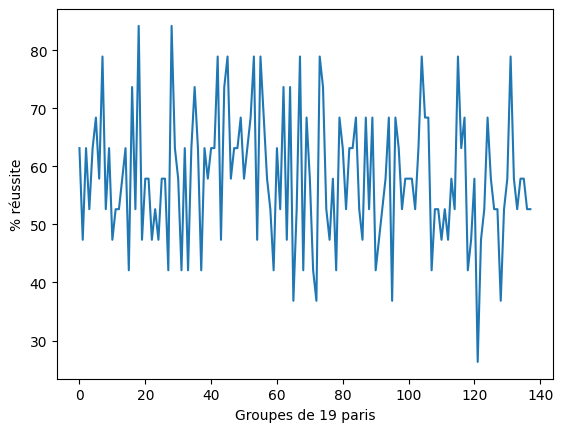

Note : 0.31


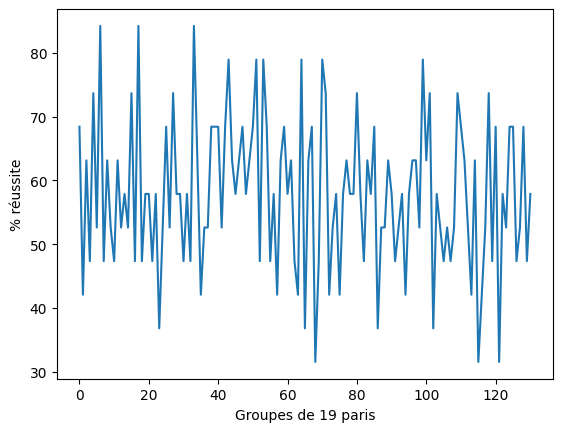

Note : 0.32


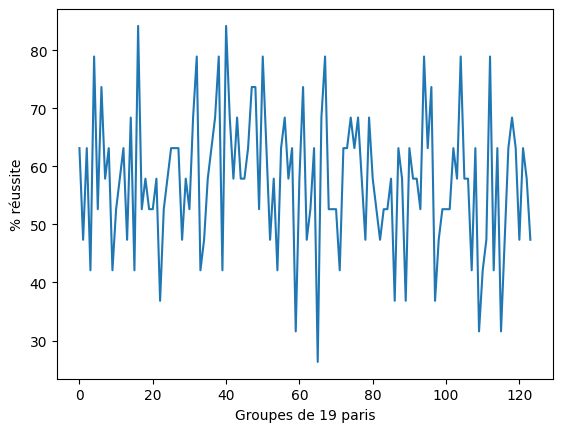

Note : 0.33


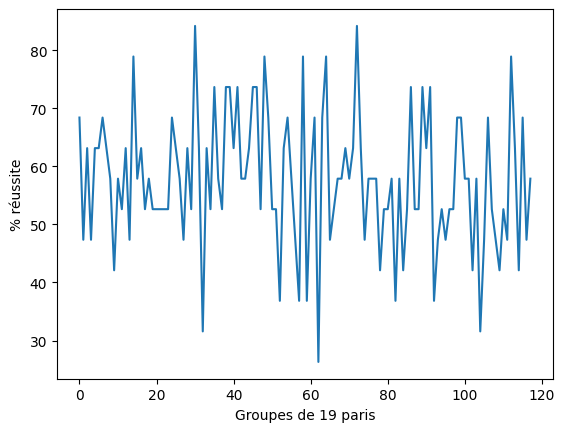

Note : 0.34


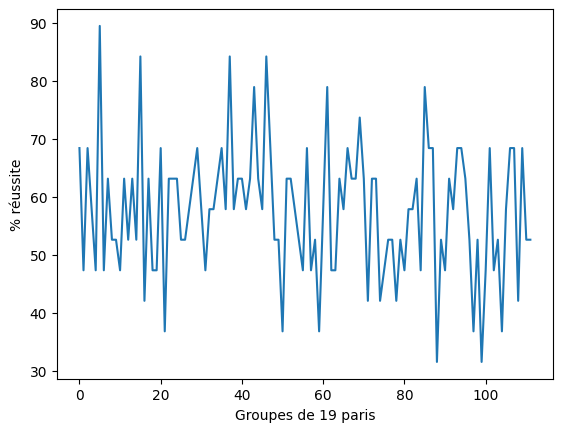

Note : 0.35


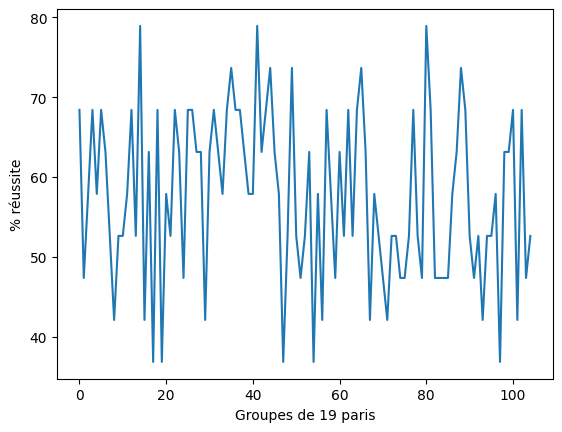

Note : 0.36


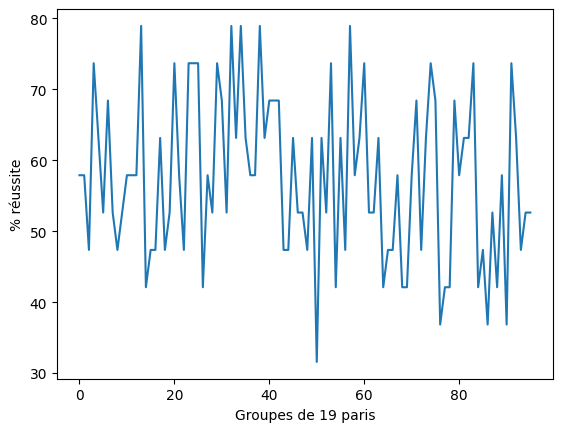

Note : 0.37


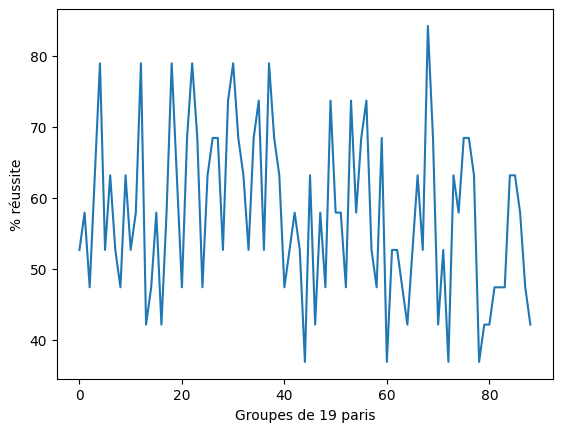

Note : 0.38


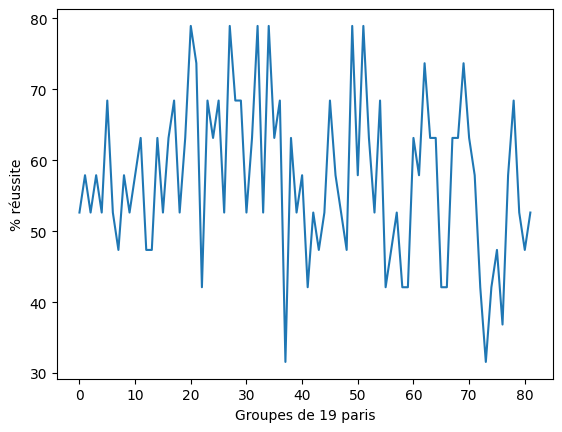

Note : 0.39


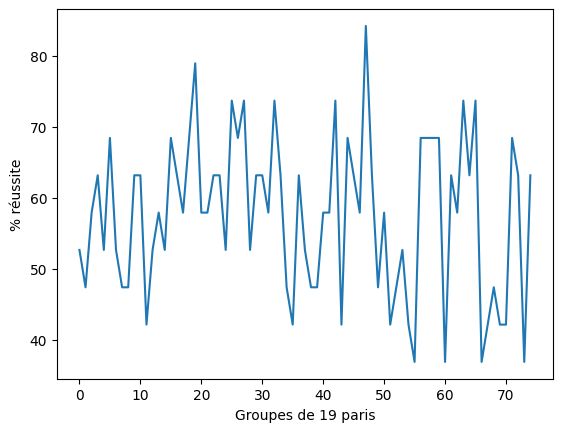

Note : 0.4


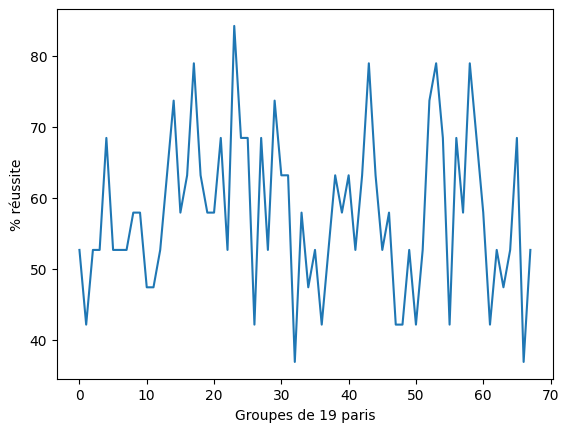

Note : 0.41


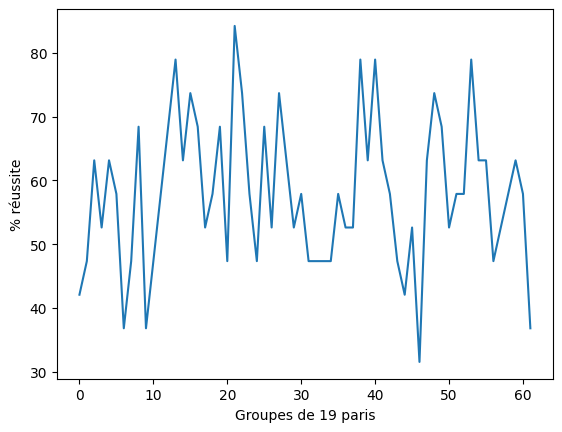

Note : 0.42


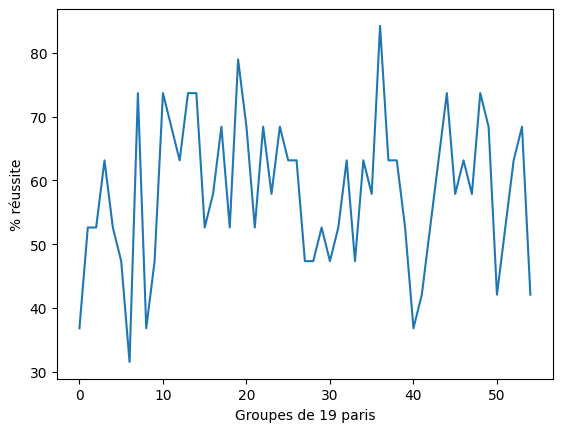

Note : 0.43


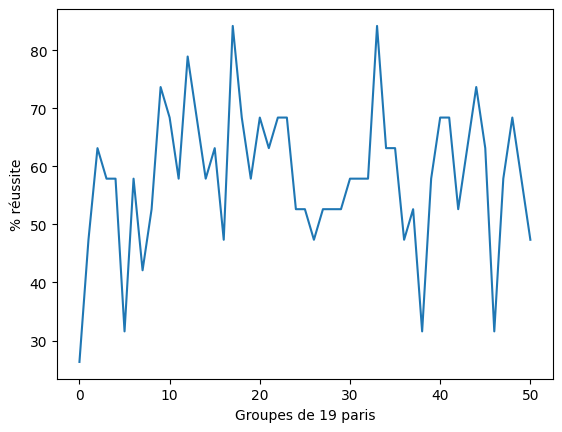

Note : 0.44


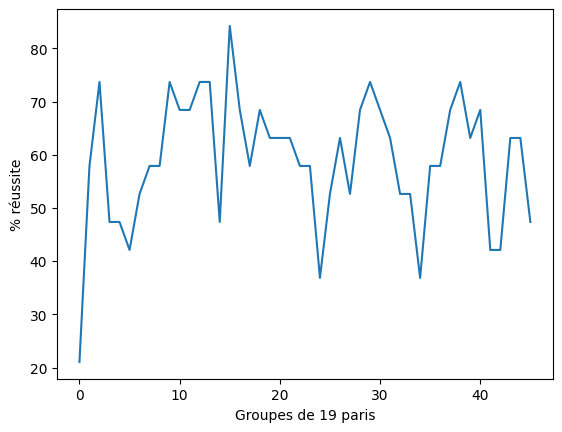

Note : 0.45


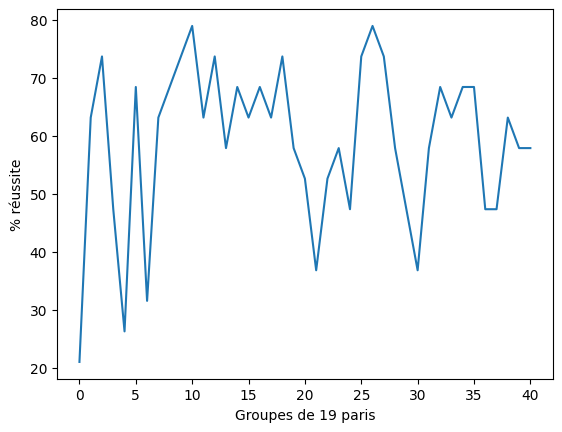

Note : 0.46


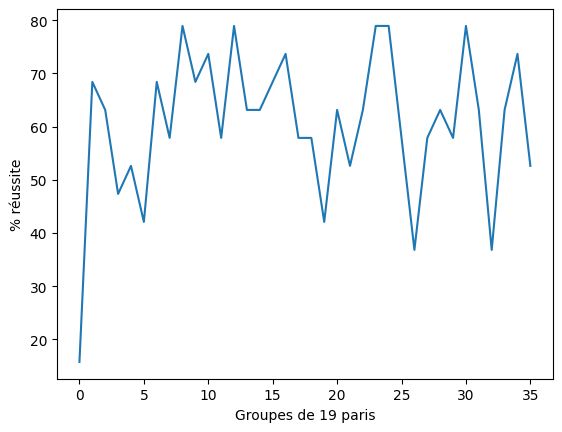

Note : 0.47


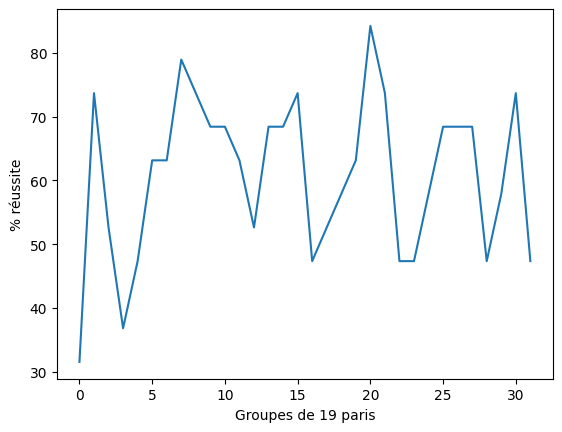

Note : 0.48


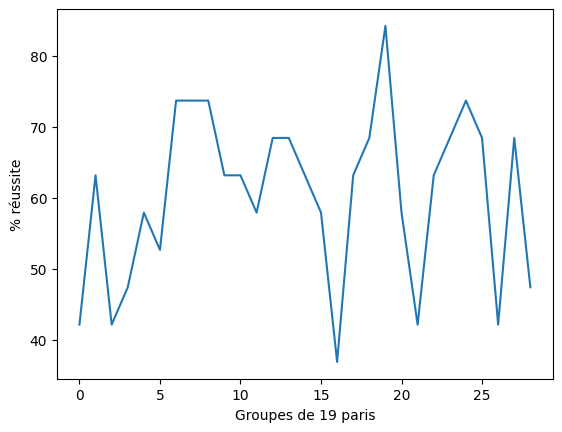

Note : 0.49


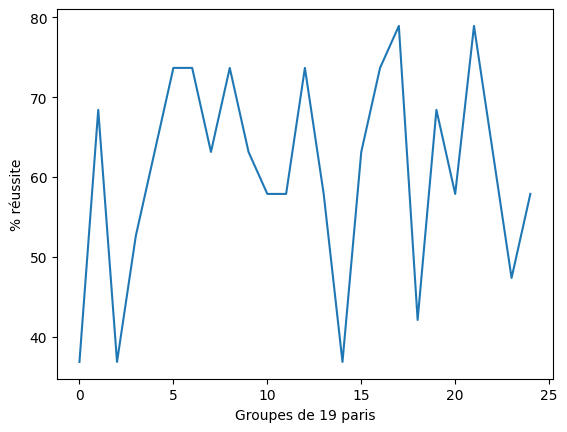

Note : 0.5


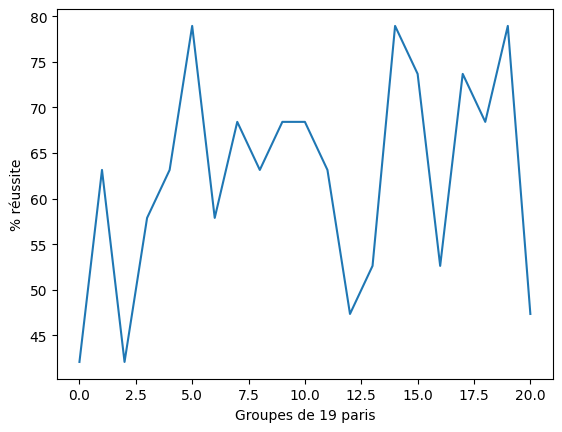

Note : 0.51


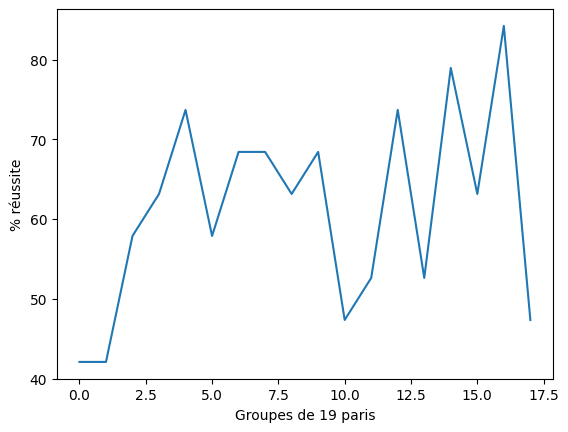

Note : 0.52


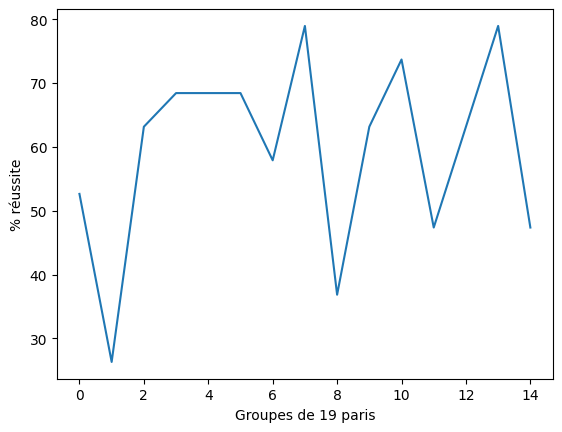

Note : 0.53


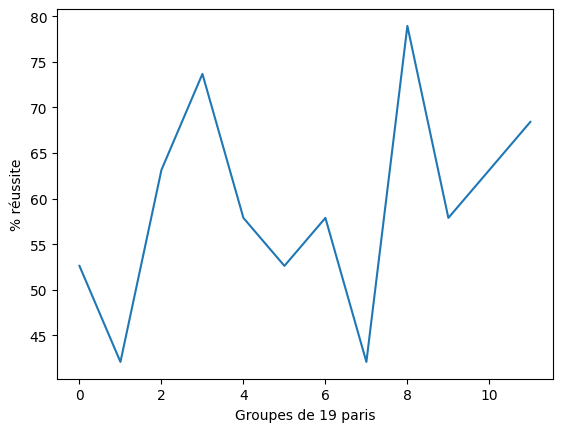

Note : 0.54


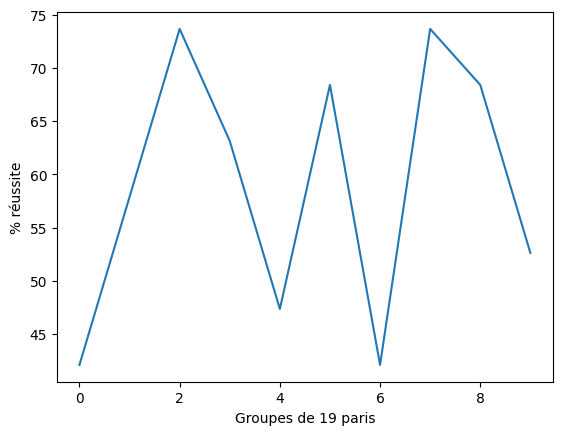

In [12]:
print(len(data))
get_plots(data, lenMatchGroups)